Author:[Yanuar Eka Putera](https://linkedin.com/in/yanuarekaputera/)\
Dataset: [sephora_website_dataset](https://www.kaggle.com/raghadalharbi/all-products-available-on-sephora-website)

# CONNECT GOOGLE, LIBRARIES & IMPORT DATASET

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%cd /content/gdrive/MyDrive/Colab Notebooks

/content/gdrive/MyDrive/Colab Notebooks


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('sephora_website_dataset.csv')

In [ ]:
df.head()

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,URL,MarketingFlags,MarketingFlags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer
0,2218774,Acqua Di Parma,Fragrance,Blu Mediterraneo MINIATURE Set,5 x 0.16oz/5mL,4.0,4,3002,66.0,75.0,https://www.sephora.com/product/blu-mediterran...,True,online only,no options,This enchanting set comes in a specially handc...,Suggested Usage:-Fragrance is intensified by t...,Arancia di Capri Eau de Toilette: Alcohol Dena...,1,0,0,0
1,2044816,Acqua Di Parma,Cologne,Colonia,0.7 oz/ 20 mL,4.5,76,2700,66.0,66.0,https://www.sephora.com/product/colonia-P16360...,True,online only,- 0.7 oz/ 20 mL Spray - 1.7 oz/ 50 mL Eau d...,An elegant timeless scent filled with a fresh-...,no instructions,unknown,1,0,0,0
2,1417567,Acqua Di Parma,Perfume,Arancia di Capri,5 oz/ 148 mL,4.5,26,2600,180.0,180.0,https://www.sephora.com/product/blu-mediterran...,True,online only,- 1oz/30mL Eau de Toilette - 2.5 oz/ 74 mL E...,Fragrance Family: Fresh Scent Type: Fresh Citr...,no instructions,Alcohol Denat.- Water- Fragrance- Limonene- Li...,1,0,0,0
3,1417617,Acqua Di Parma,Perfume,Mirto di Panarea,2.5 oz/ 74 mL,4.5,23,2900,120.0,120.0,https://www.sephora.com/product/blu-mediterran...,True,online only,- 1 oz/ 30 mL Eau de Toilette Spray - 2.5 oz/...,Panarea near Sicily is an an island suspended ...,no instructions,unknown,1,0,0,0
4,2218766,Acqua Di Parma,Fragrance,Colonia Miniature Set,5 x 0.16oz/5mL,3.5,2,943,72.0,80.0,https://www.sephora.com/product/colonia-miniat...,True,online only,no options,The Colonia Miniature Set comes in an iconic A...,Suggested Usage:-Fragrance is intensified by t...,Colonia: Alcohol Denat.- Water- Fragrance- Lim...,1,0,0,0


In [ ]:
df.describe()

,id,rating,number_of_reviews,love,price,value_price,online_only,exclusive,limited_edition,limited_time_offer
count,9.168000e+03,9168.000000,9168.000000,9.168000e+03,9168.000000,9168.00000,9168.000000,9168.000000,9168.000000,9168.000000
mean,1.962952e+06,3.990020,282.139180,1.627859e+04,50.063237,51.82359,0.234839,0.264725,0.091841,0.000327
std,3.859714e+05,1.007707,890.642028,4.260651e+04,47.164989,49.45902,0.423921,0.441211,0.288817,0.018087
min,5.000000e+01,0.000000,0.000000,0.000000e+00,2.000000,2.00000,0.000000,0.000000,0.000000,0.000000
25%,1.819453e+06,4.000000,10.000000,1.600000e+03,24.000000,25.00000,0.000000,0.000000,0.000000,0.000000
50%,2.072354e+06,4.000000,46.000000,4.800000e+03,35.000000,35.00000,0.000000,0.000000,0.000000,0.000000
75%,2.230591e+06,4.500000,210.000000,1.380000e+04,59.000000,60.00000,0.000000,1.000000,0.000000,0.000000
max,2.359685e+06,5.000000,19000.000000,1.300000e+06,549.000000,549.00000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.shape

(9168, 21)

# Introduction
* Sephora adalah **perusahaan make-up and cosmetics**
* Sephora menjalankan bisnisnya menggabungkan **pembelanjaan digital menggunakan website e-commerce maupun pembelanjaan fisik melalui gerainya.**
* **E-commerce lebih ekslusif** atau lebih ke personal branding perusahaan, biasanya produk yang dijual merupakan produk perusahaan sendiri dan kepemilikan websitenya dimiliki oleh perusahaan sendiri.
* Namun Perusahaan sephora ini, produk yang dijualnya bukan brand sendiri saja. Ada produk brand lain yang dijual pada website maupun gerainya.  

# Catatan


# About The Data
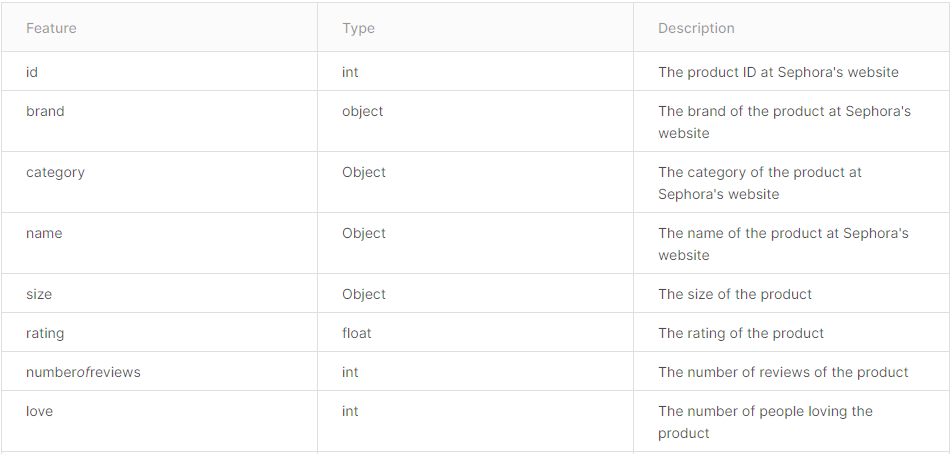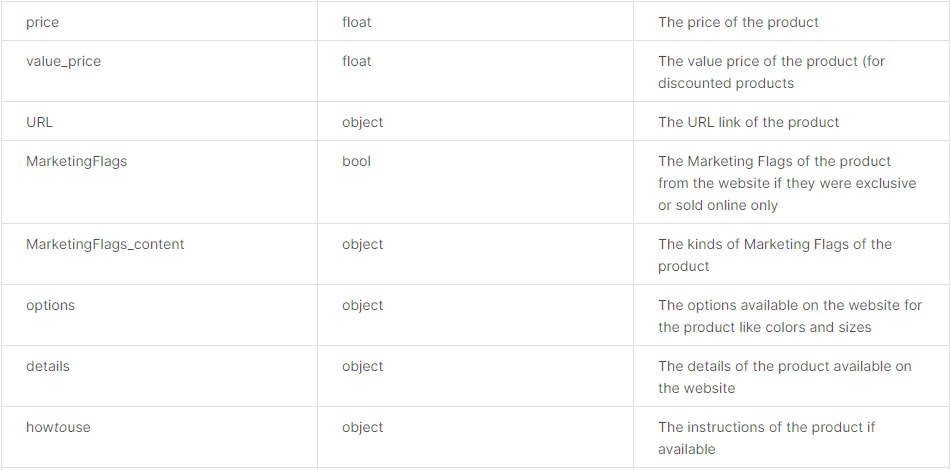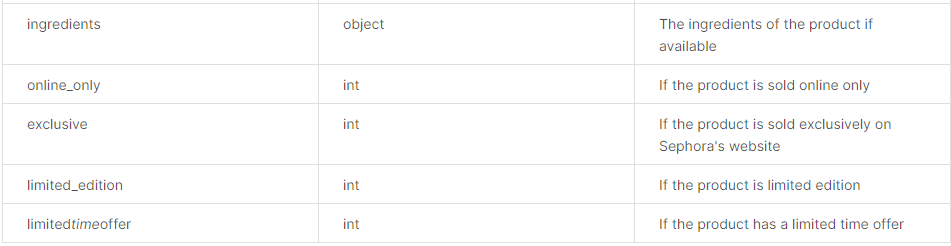

In [ ]:
df.nunique()

id                        9115
brand                      324
category                   143
name                      9106
size                      1623
rating                      10
number_of_reviews          833
love                      1683
price                      286
value_price                322
URL                       9168
MarketingFlags               2
MarketingFlags_content      10
options                    564
details                   8839
how_to_use                6497
ingredients               6962
online_only                  2
exclusive                    2
limited_edition              2
limited_time_offer           2
dtype: int64

#Business Question
1. Produk apa yang paling banyak mendapatkan review baik dari customer?
2. Kategori produk apa yang paling disukai oleh customer?
3. Apakah kategori produk yang mendapatkan love atau review terbanyak merupakan produk yang harganya terjangkau ?
4. Apakah produk yang sudah diberi strategi marketing adalah produk yang paling disukai oleh customer?
5. Apakah produk yang ekslusif adalah produk yang mahal (diatas rata-rata)?

#Data Prepocessing
1. Tipe data sudah sesuai
2. Tidak ada missing values
3. Tidak ada baris yang terduplikasi
4. Transformasi data dilakukan kepada kolom MarketingFlags yang bernilai true dan false menjadi 1 dan 0 untuk melakukan korelasi.
5. Berdasarkan analisis korelasi, terdapat hubungan sebagai berikut:
  * **love** dengan **number_of_reviews** sebesar 75%, Jika love bertambah maka number of reviews akan bertambah juga.
  * **MarketingFlags** dengan **exclusive** sebesar 63%, Jika MarketingFlags bertambah maka exclusive akan bertambah juga.
  * **MarketingFlags** dengan **online_only** sebesar 58%, Jika MarketingFlags bertambah maka online_only akan bertambah juga.
6. Hanya 2 kolom yang bertipe data number tidak memiliki outlier yaitu exclusive dan marketingFlags
7. Berdasarkan distribusi plot pada analisis outliers terdapat informasi sebagai berikut:
  * Jika di rata-rata banyak produk dijual dengan **price** maupun **value price** dikisaran harga 20 dollar sampai 50 dollar
  * Jika di rata-rata banyak produk direview setidaknya kurang dari 100 customer
  * Kebanyakan customer memberi rating bai kepada produk dikisaran 3,5 sampai 5.
  * Nomor Id produk pada website kebanyakan dikisaran diatas 2 juta

In [ ]:
#Handle Missmatch Data Type
df.dtypes

id                          int64
brand                      object
category                   object
name                       object
size                       object
rating                    float64
number_of_reviews           int64
love                        int64
price                     float64
value_price               float64
URL                        object
MarketingFlags               bool
MarketingFlags_content     object
options                    object
details                    object
how_to_use                 object
ingredients                object
online_only                 int64
exclusive                   int64
limited_edition             int64
limited_time_offer          int64
dtype: object

In [ ]:
#Handle Missing Values
df.isnull().sum()

id                        0
brand                     0
category                  0
name                      0
size                      0
rating                    0
number_of_reviews         0
love                      0
price                     0
value_price               0
URL                       0
MarketingFlags            0
MarketingFlags_content    0
options                   0
details                   0
how_to_use                0
ingredients               0
online_only               0
exclusive                 0
limited_edition           0
limited_time_offer        0
dtype: int64

In [ ]:
##Handle Duplicated Rows
df.duplicated().sum()

0

In [ ]:
#Handle Duplicated Rows
df[df.duplicated()]

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,URL,MarketingFlags,MarketingFlags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer


In [ ]:
#Transform Data Boolean
df_cor=df
df_cor['MarketingFlags']=pd.get_dummies(df_cor['MarketingFlags'])
df_cor.head()

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,URL,MarketingFlags,MarketingFlags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer
0,2218774,Acqua Di Parma,Fragrance,Blu Mediterraneo MINIATURE Set,5 x 0.16oz/5mL,4.0,4,3002,66.0,75.0,https://www.sephora.com/product/blu-mediterran...,0,online only,no options,This enchanting set comes in a specially handc...,Suggested Usage:-Fragrance is intensified by t...,Arancia di Capri Eau de Toilette: Alcohol Dena...,1,0,0,0
1,2044816,Acqua Di Parma,Cologne,Colonia,0.7 oz/ 20 mL,4.5,76,2700,66.0,66.0,https://www.sephora.com/product/colonia-P16360...,0,online only,- 0.7 oz/ 20 mL Spray - 1.7 oz/ 50 mL Eau d...,An elegant timeless scent filled with a fresh-...,no instructions,unknown,1,0,0,0
2,1417567,Acqua Di Parma,Perfume,Arancia di Capri,5 oz/ 148 mL,4.5,26,2600,180.0,180.0,https://www.sephora.com/product/blu-mediterran...,0,online only,- 1oz/30mL Eau de Toilette - 2.5 oz/ 74 mL E...,Fragrance Family: Fresh Scent Type: Fresh Citr...,no instructions,Alcohol Denat.- Water- Fragrance- Limonene- Li...,1,0,0,0
3,1417617,Acqua Di Parma,Perfume,Mirto di Panarea,2.5 oz/ 74 mL,4.5,23,2900,120.0,120.0,https://www.sephora.com/product/blu-mediterran...,0,online only,- 1 oz/ 30 mL Eau de Toilette Spray - 2.5 oz/...,Panarea near Sicily is an an island suspended ...,no instructions,unknown,1,0,0,0
4,2218766,Acqua Di Parma,Fragrance,Colonia Miniature Set,5 x 0.16oz/5mL,3.5,2,943,72.0,80.0,https://www.sephora.com/product/colonia-miniat...,0,online only,no options,The Colonia Miniature Set comes in an iconic A...,Suggested Usage:-Fragrance is intensified by t...,Colonia: Alcohol Denat.- Water- Fragrance- Lim...,1,0,0,0


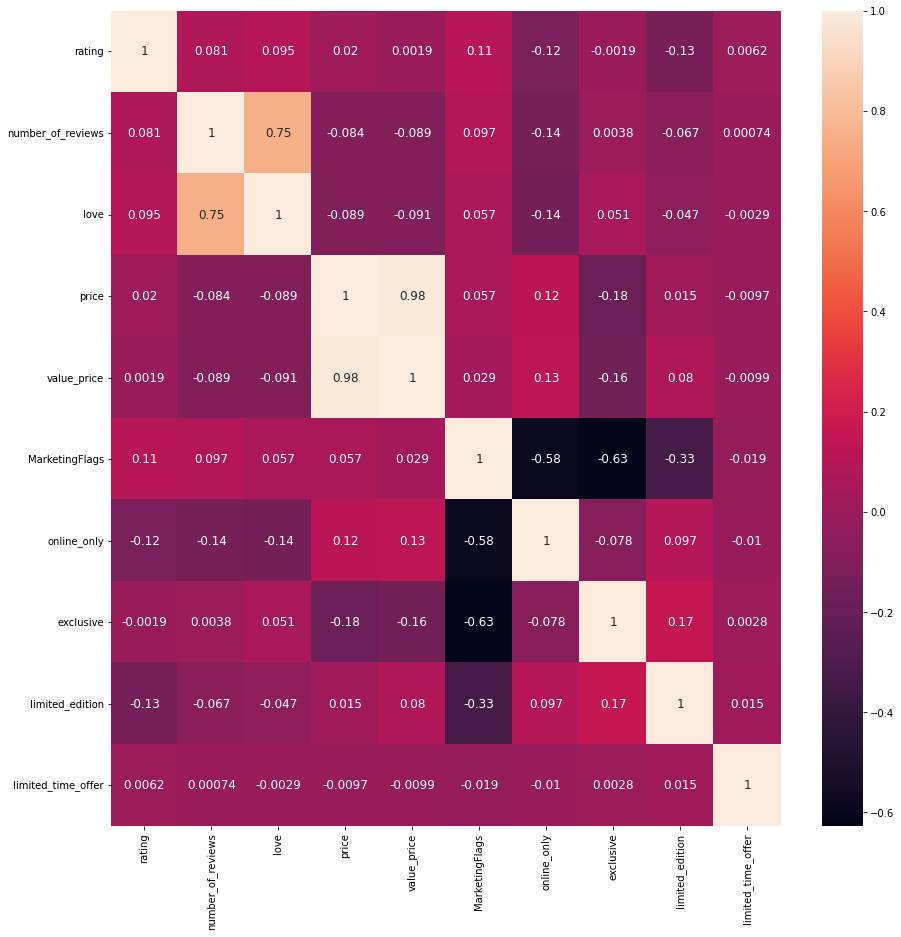

In [ ]:
#Correlation Analysis
#Mengambil nilai numerik dari setiap kolom
df_heat=df_cor.select_dtypes(include='number')[["rating","number_of_reviews","love","price","value_price","MarketingFlags","online_only","exclusive","limited_edition","limited_time_offer"]].corr()

#Vsualisasi data
plt.figure(figsize=(15,15))
sns.heatmap(df_heat, annot=True, annot_kws={"size": 12})

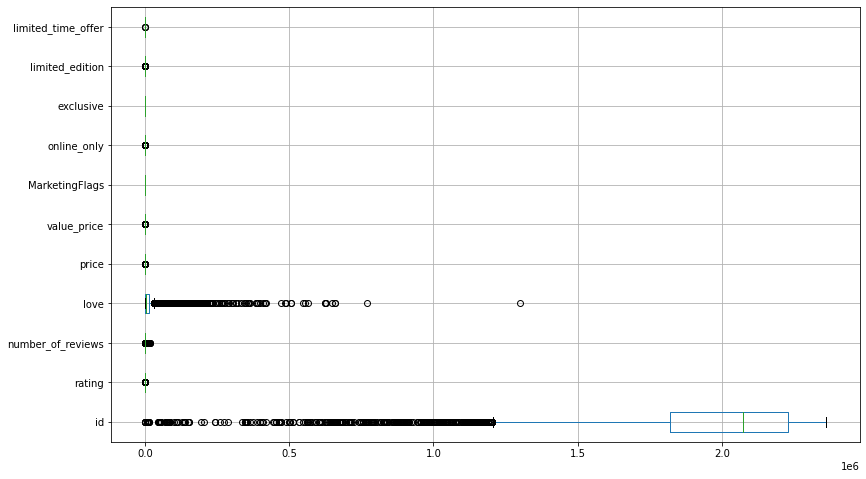

In [ ]:
#Analisis Outlier Analysis

plt.figure(figsize=(16, 8))

# Create Boxplot
df.boxplot(vert=False)
plt.subplots_adjust(left=0.25)
plt.show()

## Handle Outlier

In [ ]:
#Handle Outlier in limited_time_offer
Q1 = df["limited_time_offer"].quantile(0.25)
Q3 = df["limited_time_offer"].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (IQR * 1.5)
high_limit = Q3 + (IQR * 1.5)
df = df[(df["limited_time_offer"] >= low_limit) & (df["limited_time_offer"] <= high_limit)]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


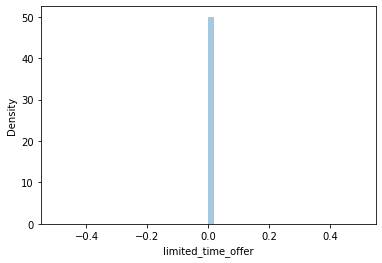

In [ ]:
sns.distplot(df['limited_time_offer'])

In [ ]:
#Handle Outlier in limited_time_offer
Q1 = df["limited_edition"].quantile(0.25)
Q3 = df["limited_edition"].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (IQR * 1.5)
high_limit = Q3 + (IQR * 1.5)
df = df[(df["limited_edition"] >= low_limit) & (df["limited_edition"] <= high_limit)]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


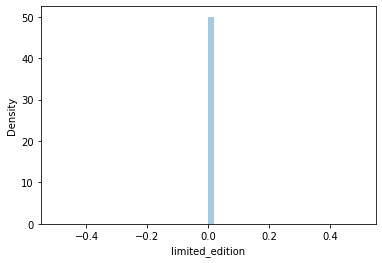

In [ ]:
sns.distplot(df['limited_edition'])

In [ ]:
#Handle Outlier in online_only
Q1 = df["online_only"].quantile(0.25)
Q3 = df["online_only"].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (IQR * 1.5)
high_limit = Q3 + (IQR * 1.5)
df = df[(df["online_only"] >= low_limit) & (df["online_only"] <= high_limit)]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


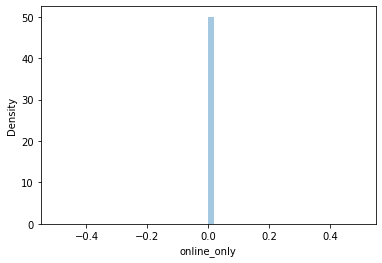

In [ ]:
sns.distplot(df['online_only'])

In [ ]:
#Handle Outlier in value_price
Q1 = df["value_price"].quantile(0.25)
Q3 = df["value_price"].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (IQR * 1.5)
high_limit = Q3 + (IQR * 1.5)
df = df[(df["value_price"] >= low_limit) & (df["value_price"] <= high_limit)]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


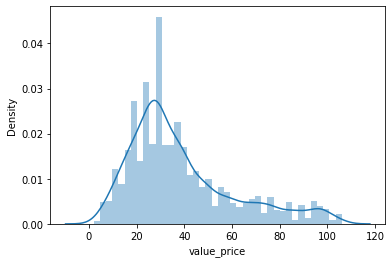

In [ ]:
sns.distplot(df['value_price'])

In [ ]:
#Handle Outlier in price
Q1 = df["price"].quantile(0.25)
Q3 = df["price"].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (IQR * 1.5)
high_limit = Q3 + (IQR * 1.5)
df = df[(df["price"] >= low_limit) & (df["price"] <= high_limit)]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


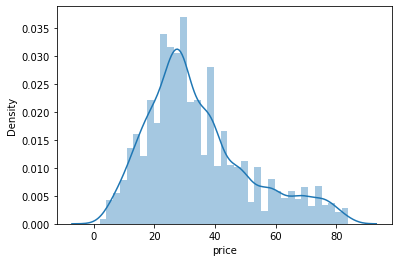

In [ ]:
sns.distplot(df['price'])

In [ ]:
#Handle Outlier in love
Q1 = df["love"].quantile(0.25)
Q3 = df["love"].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (IQR * 1.5)
high_limit = Q3 + (IQR * 1.5)
df = df[(df["love"] >= low_limit) & (df["love"] <= high_limit)]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


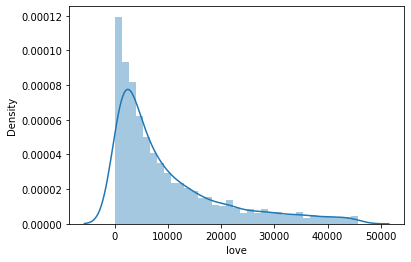

In [ ]:
sns.distplot(df['love'])

In [ ]:
#Handle Outlier in number_of_reviews
Q1 = df["number_of_reviews"].quantile(0.25)
Q3 = df["number_of_reviews"].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (IQR * 1.5)
high_limit = Q3 + (IQR * 1.5)
df = df[(df["number_of_reviews"] >= low_limit) & (df["number_of_reviews"] <= high_limit)]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


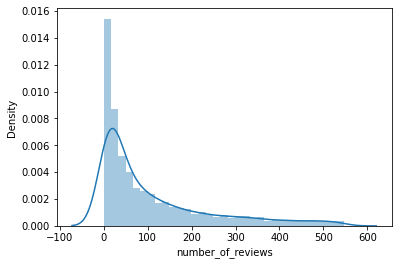

In [ ]:
sns.distplot(df['number_of_reviews'])

In [ ]:
#Handle Outlier in rating
Q1 = df["rating"].quantile(0.25)
Q3 = df["rating"].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (IQR * 1.5)
high_limit = Q3 + (IQR * 1.5)
df = df[(df["rating"] >= low_limit) & (df["rating"] <= high_limit)]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


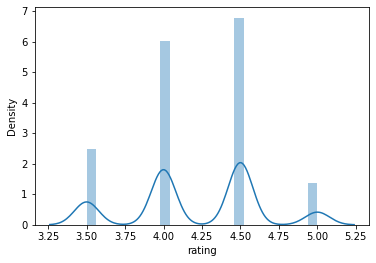

In [ ]:
sns.distplot(df['rating'])

In [ ]:
#Handle Outlier in id
Q1 = df["id"].quantile(0.25)
Q3 = df["id"].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (IQR * 1.5)
high_limit = Q3 + (IQR * 1.5)
df = df[(df["id"] >= low_limit) & (df["id"] <= high_limit)]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


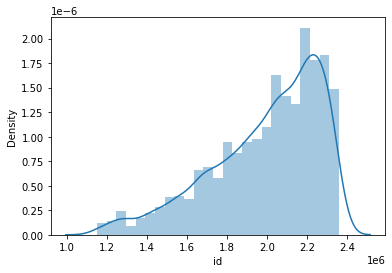

In [ ]:
sns.distplot(df['id'])

# Answer Question Business

## Produk apa yang paling banyak mendapatkan review baik dari customer?
***Review baik didapat dari banyaknya jumlah review, jumlah love, yang memiliki rating diatas mean / rataan.***
* Produk dengan brand Yves Saint Laurent yang termasuk keadalam kategori Tinted Moisturizer.
* Sedangkan secara keseluruhan berdasarkan kategori produk, yang paling banyak mendapatkan review baik dan disukai oleh customer adalah kategori face serums dengan total review baik sebanyak 1054 dan love sebanyak 43000

In [ ]:
# Melihat rating yang ada
rating=df['rating'].value_counts().reset_index().sort_values(by='index',ascending=False).reset_index(drop=True)
rating.rename(columns = {'index':'rating','rating':'count'}, inplace = True)
rating

,rating,count
0,5.0,323
1,4.5,1569
2,4.0,1444
3,3.5,610


In [ ]:
# Membuat subset dan melihat nilai rata-rata
review=df[['brand','name','category','rating','number_of_reviews','love']]
review.describe()

,rating,number_of_reviews,love
count,3946.000000,3946.000000,3946.000000
mean,4.203371,111.583122,8808.053979
std,0.422601,128.395834,9054.060622
min,3.500000,1.000000,0.000000
25%,4.000000,19.000000,2400.000000
50%,4.000000,57.000000,5500.000000
75%,4.500000,160.000000,12200.000000
max,5.000000,548.000000,45800.000000


In [ ]:
#Melakukan filter catergory yang memiliki review baik dan love banyak
review_baik=review[(review['rating']>=4.203371)&
       (review['number_of_reviews']>=111.583122)&
       (review['love']>=8808.053979)].sort_values(by='number_of_reviews',ascending=False).reset_index(drop=True)
review_baik = review_baik.head(10)
review_baik

,brand,name,category,rating,number_of_reviews,love
0,Yves Saint Laurent,TOUCHE ECLAT All-In-One Glow,Tinted Moisturizer,4.5,548,33400
1,Playa,Ritual Hair Oil,Hair Oil,4.5,542,10800
2,PAT McGRATH LABS,Skin Fetish: Sublime Perfection Concealer,Concealer,4.5,539,22000
3,SEPHORA COLLECTION,Illuminate Palette,Highlighter,4.5,538,35200
4,Glow Recipe,Watermelon Glow Lip Pop,Lip Balms & Treatments,4.5,537,20800
5,Caudalie,Moisturizing Toner,Toners,4.5,533,35700
6,Dr. Jart+,Cicapair™ Tiger Grass Calming Gel Cream,Moisturizers,4.5,532,10200
7,Peter Thomas Roth,Retinol Fusion PM,Face Serums,4.5,530,20900
8,Hourglass,Arch Brow Micro Sculpting Pencil,Eyebrow,4.5,524,12100
9,Kate Somerville,Anti Bac Clearing Lotion,Face Serums,4.5,524,22100


Text(0.5, 1.0, 'Number of Good Reviews each product')

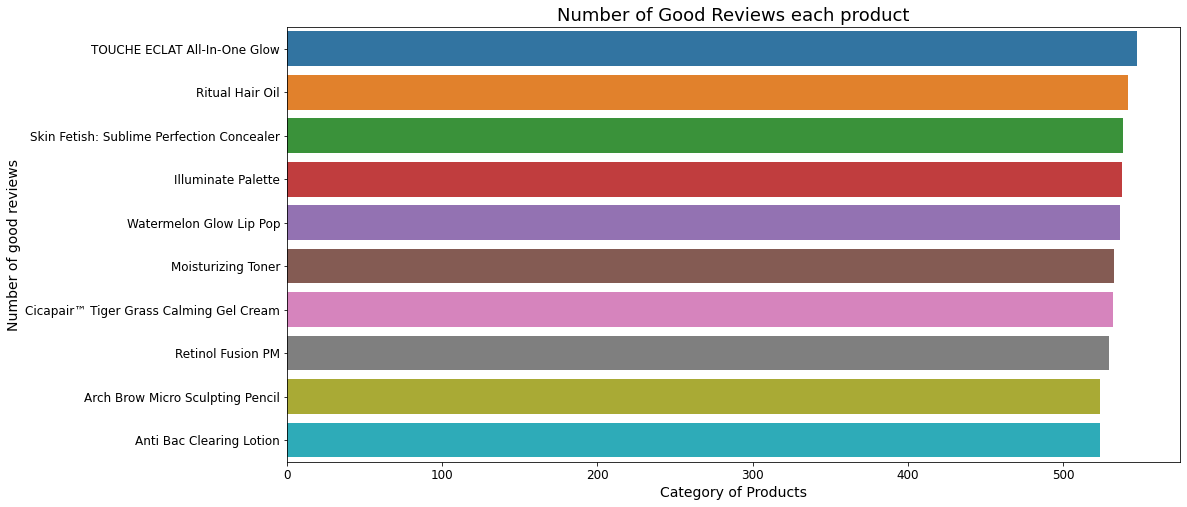

In [ ]:
plt.figure(figsize=(16, 8))
sns.barplot(
    y="name",
    x="number_of_reviews",
    data=review_baik)

plt.xlabel("Category of Products",fontsize=14)
plt.ylabel("Number of good reviews",fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.title("Number of Good Reviews each product",fontsize=18)

In [ ]:
#Membuat subset rating paling baik
review_baik_cat=review_baik.groupby(['category','rating'])['number_of_reviews','love'].sum().reset_index().sort_values(by='number_of_reviews',ascending=False).reset_index(drop = True).head(5)
review_baik_cat

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,category,rating,number_of_reviews,love
0,Face Serums,4.5,1054,43000
1,Tinted Moisturizer,4.5,548,33400
2,Hair Oil,4.5,542,10800
3,Concealer,4.5,539,22000
4,Highlighter,4.5,538,35200


Text(0.5, 1.0, 'Number of Good Reviews each category')

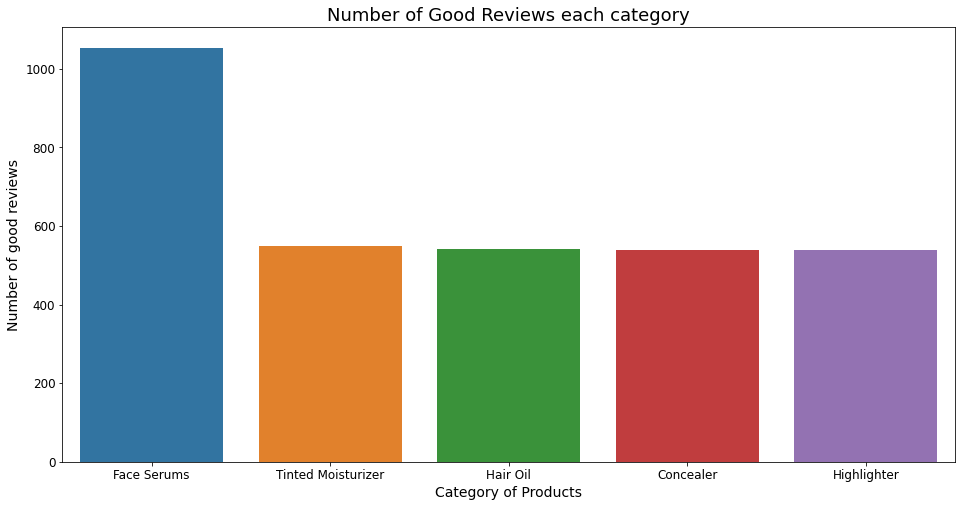

In [ ]:
plt.figure(figsize=(16, 8))
sns.barplot(
    y="number_of_reviews",
    x="category",
    data=review_baik_cat)

plt.xlabel("Category of Products",fontsize=14)
plt.ylabel("Number of good reviews",fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.title("Number of Good Reviews each category",fontsize=18)

Text(0.5, 1.0, 'Number of love from good reviews each category')

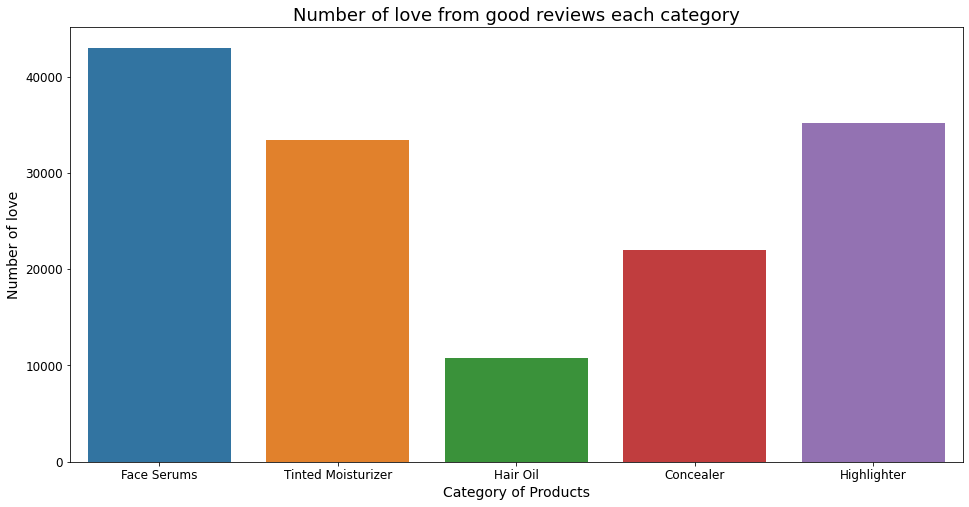

In [ ]:
plt.figure(figsize=(16, 8))
sns.barplot(
    y="love",
    x="category",
    data=review_baik_cat)

plt.xlabel("Category of Products",fontsize=14)
plt.ylabel("Number of love",fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.title("Number of love from good reviews each category",fontsize=18)

In [ ]:
#Melakukan filter catergory yang memiliki review baik dan love banyak
review_baik_brand=review[
       (review['category'].isin(['Face Mask']))&
       (review['rating']>=4.203371)&
       (review['number_of_reviews']>=111.583122)&
       (review['love']>=8808.053979)].sort_values(by='number_of_reviews',ascending=False).reset_index(drop=True)
review_baik_brand = review_baik_brand.head(5)
review_baik_brand

,brand,name,category,rating,number_of_reviews,love


## Kategori produk apa yang paling disukai oleh customer?
Kategori produk lipstick karena memiliki total love terbanyak yaitu 1.610.700

In [ ]:
max_cat_prod_love=df[['category','love']]
max_cat_prod_love=max_cat_prod_love.groupby('category')['love'].sum().reset_index().sort_values(by='love',ascending=False).reset_index(drop=True).head(5)
max_cat_prod_love

,category,love
0,Lipstick,1610700
1,Moisturizers,1286642
2,Face Masks,1245872
3,Face Brushes,1236776
4,Eye Palettes,1135900


Text(0.5, 1.0, 'Number of Loves each category')

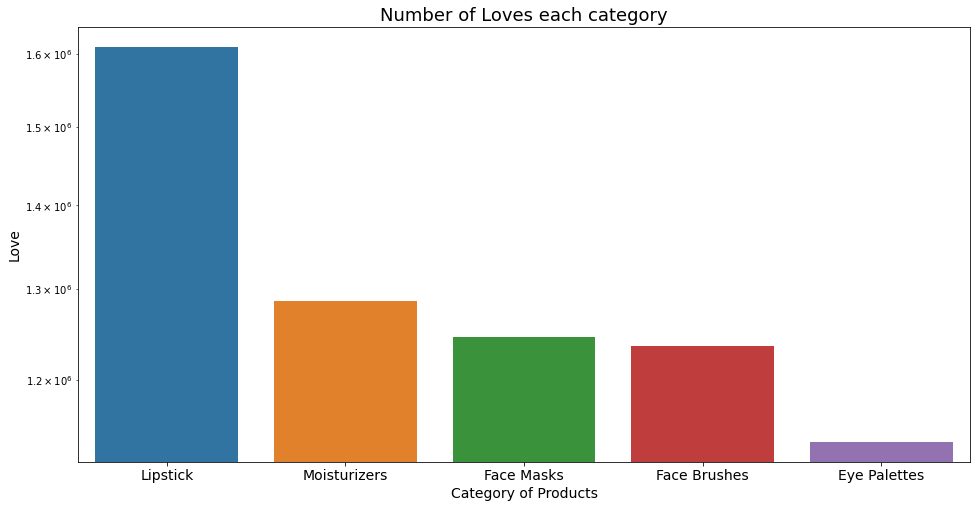

In [ ]:
plt.figure(figsize=(16, 8))
sns.barplot(
    y="love",
    x="category",
    data=max_cat_prod_love)

plt.yscale('log')
plt.xlabel("Category of Products",fontsize=14)
plt.ylabel("Love",fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.title("Number of Loves each category",fontsize=18)

## Apakah kategori produk yang paling disukai adalah produk yang harganya murah ?
* Lipstick yang memiliki price dibawah rata-rata.
* Sedangkan produk yang paling banyak di review adalah Moisturizer memiliki price diatas rata-rata.

In [ ]:
min_price=df[['id','love','number_of_reviews','price']]
min_price.describe()

,id,love,number_of_reviews,price
count,3.946000e+03,3946.000000,3946.000000,3946.000000
mean,1.994408e+06,8808.053979,111.583122,34.898188
std,2.724634e+05,9054.060622,128.395834,17.498520
min,1.151711e+06,0.000000,1.000000,2.000000
25%,1.822347e+06,2400.000000,19.000000,24.000000
50%,2.055644e+06,5500.000000,57.000000,30.000000
75%,2.213234e+06,12200.000000,160.000000,44.000000
max,2.358570e+06,45800.000000,548.000000,84.000000


In [ ]:
min_price=df[['category','love','number_of_reviews','price']]
min_price=min_price.groupby('category')[['love','number_of_reviews','price']].sum().reset_index().sort_values(by='love',ascending=False).reset_index(drop=True)
min_price

,category,love,number_of_reviews,price
0,Lipstick,1610700,11050,2710.00
1,Moisturizers,1286642,27168,9505.98
2,Face Masks,1245872,16027,4208.93
3,Face Brushes,1236776,10067,4913.00
4,Eye Palettes,1135900,6864,3033.50
...,...,...,...,...
130,no category,2000,58,91.00
131,Shampoo & Conditioner,1600,13,32.00
132,Cologne Gift Sets,1300,6,82.00
133,Deodorant for Men,897,9,53.00


In [ ]:
min_price[min_price['category'].isin(['Lipstick','Moisturizers'])].describe()

,love,number_of_reviews,price
count,2.000000e+00,2.000000,2.000000
mean,1.448671e+06,19109.000000,6107.990000
std,2.291436e+05,11397.147099,4805.483543
min,1.286642e+06,11050.000000,2710.000000
25%,1.367656e+06,15079.500000,4408.995000
50%,1.448671e+06,19109.000000,6107.990000
75%,1.529686e+06,23138.500000,7806.985000
max,1.610700e+06,27168.000000,9505.980000


In [ ]:
min_price=min_price[min_price['category'].isin(['Lipstick','Moisturizers'])].sort_values(by='price',ascending=False)

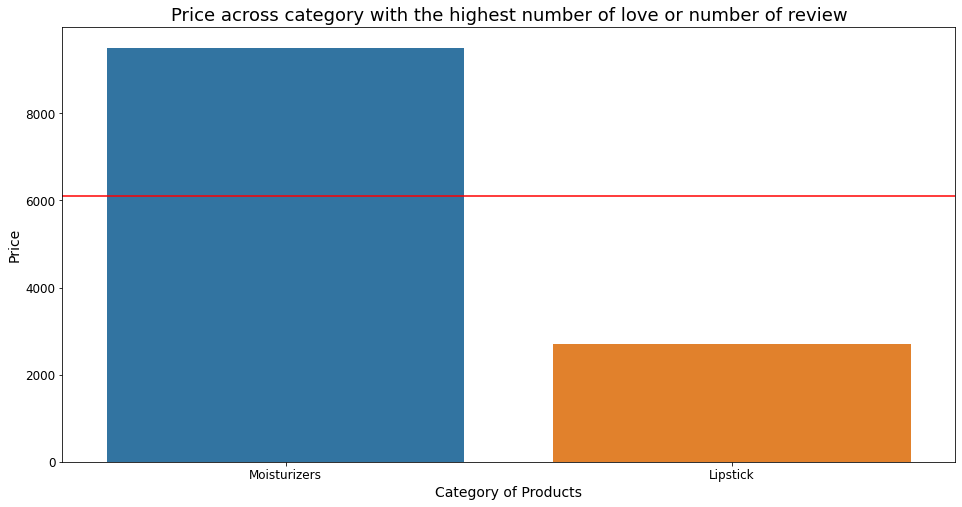

In [ ]:
plt.figure(figsize=(16, 8))
sns.barplot(
    y="price",
    x="category",
    data=min_price)

#Drawing a horizontal line at point 6107.
plt.axhline(6107.990000,color="red")

plt.xlabel("Category of Products",fontsize=14)
plt.ylabel("Price",fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.title("Price across category with the highest number of love or number of review",fontsize=18)
plt.show()

## Apakah kategori produk yang sudah diberi strategi marketing adalah produk yang paling kategori disukai oleh customer?
Kategori produk yang diberi strategi marketing adalah kategori produk yang paling banyak disukai oleh customer. Tetapi produk yang tidak diberi strategi marketing pun lebih banyak yang suka.

In [ ]:
market_strat=df[['MarketingFlags','category','love']]
market_strat=market_strat.groupby(['MarketingFlags','category'])['love'].sum().reset_index().sort_values(by='love',ascending=False).reset_index(drop=True)
market_strat=market_strat[market_strat['category'].isin(['Lipstick','Moisturizers','Hair Styling Products','Eye Creams & Treatments','Face Brushes'])].reset_index(drop=True)
market_strat

,MarketingFlags,category,love
0,1,Lipstick,1300900
1,1,Moisturizers,916014
2,1,Hair Styling Products,761057
3,1,Eye Creams & Treatments,753804
4,0,Face Brushes,690100
5,1,Face Brushes,546676
6,0,Moisturizers,370628
7,0,Lipstick,309800
8,0,Eye Creams & Treatments,308600
9,0,Hair Styling Products,81230


Text(0.5, 1.0, 'MarketingFlags Across Category and Love')

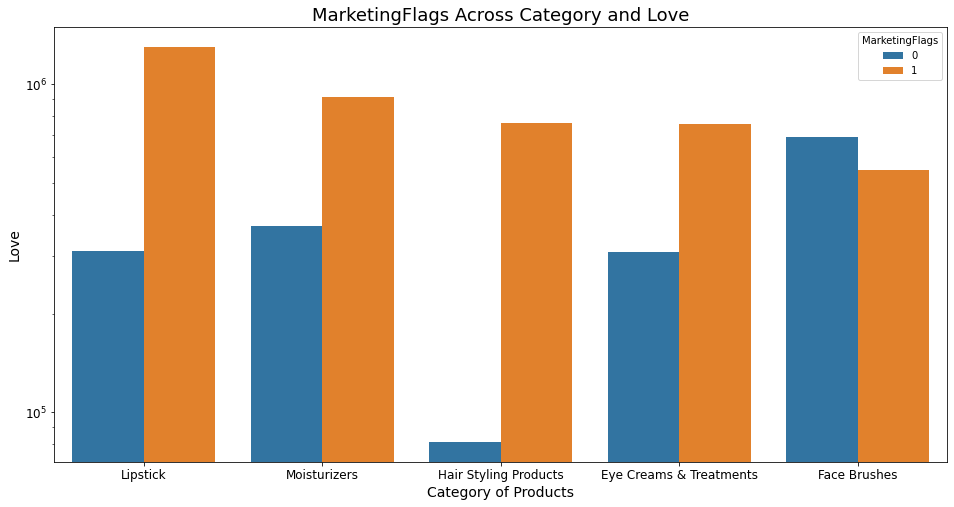

In [ ]:
plt.figure(figsize=(16, 8))
sns.barplot(
    y="love",
    x="category",
    hue="MarketingFlags",
    data=market_strat)

plt.yscale('log')
plt.xlabel("Category of Products",fontsize=14)
plt.ylabel("Love",fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.title("MarketingFlags Across Category and Love",fontsize=18)

## Apakah kategori produk yang ekslusif adalah produk yang mahal (diatas harga rata-rata keseluruhan produk)?
Produk yang ekslusif bukanlah produk yang mahal **dan produknya kebanyakan diisi oleh brand sephora sendiri.**

In [ ]:
prod_exc=df[['category','exclusive','price']]
prod_exc=prod_exc.groupby(['category','exclusive'])['price'].sum().reset_index().sort_values(by='price',ascending=False).reset_index(drop=True)
prod_exc

,category,exclusive,price
0,Moisturizers,0,7525.0
1,Perfume,0,5782.0
2,Face Serums,0,4561.0
3,Eye Creams & Treatments,0,4378.5
4,Face Wash & Cleansers,0,3424.0
...,...,...,...
236,Facial Cleansing Brushes,1,10.0
237,Curling Irons,0,10.0
238,no category,1,10.0
239,Spa Tools,1,9.0


In [ ]:
#Memmisahkan antara yang ekslusif dengan yang bukan untuk dibandingkan
bukan_ekslusif=prod_exc[prod_exc['exclusive'].isin([0])]
ekslusif0=bukan_ekslusif.groupby(['exclusive'])['price'].sum().reset_index()
ekslusif0['mean']=bukan_ekslusif['price'].mean()
ekslusif0

,exclusive,price,mean
0,0,104179.93,801.384077


In [ ]:
#Memmisahkan antara yang ekslusif dengan yang bukan untuk dibandingkan
benar_ekslusif=prod_exc[prod_exc['exclusive'].isin([1])]
ekslusif1=benar_ekslusif.groupby(['exclusive'])['price'].sum().reset_index()
ekslusif1['mean']=benar_ekslusif['price'].mean()
ekslusif1

,exclusive,price,mean
0,1,33528.32,302.056937


In [ ]:
#Menggabungkan ekslusif untuk di plot
plot_ekslusif=ekslusif0.append(ekslusif1, ignore_index=True)
plot_ekslusif

,exclusive,price,mean
0,0,104179.93,801.384077
1,1,33528.32,302.056937


In [ ]:
plot_ekslusif['exclusive']=plot_ekslusif['exclusive'].apply(lambda x : "Not Exclusive" if x==0 else "Exclusive")
plot_ekslusif

,exclusive,price,mean
0,Not Exclusive,104179.93,801.384077
1,Exclusive,33528.32,302.056937


Text(0.5, 1.0, 'Mean of Price Product Exclusive vs Mean of Price Product not Exclusive')

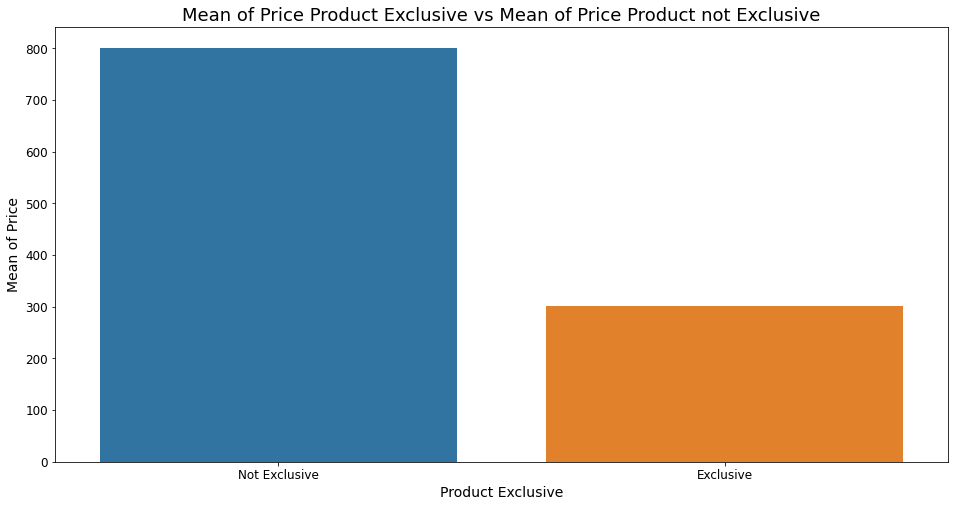

In [ ]:
plt.figure(figsize=(16, 8))
sns.barplot(
    y="mean",
    x="exclusive",
    data=plot_ekslusif)


plt.xlabel("Product Exclusive",fontsize=14)
plt.ylabel("Mean of Price",fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.title("Mean of Price Product Exclusive vs Mean of Price Product not Exclusive",fontsize=18)



In [ ]:
evid_exc=df[['brand','exclusive']]
evid_exc[evid_exc['exclusive'].isin([1])].value_counts().reset_index()

,brand,exclusive,0
0,SEPHORA COLLECTION,1,269
1,MAKE UP FOR EVER,1,61
2,Kérastase,1,40
3,innisfree,1,32
4,tarte,1,23
...,...,...,...
148,Narciso Rodriguez,1,1
149,SUNDAY RILEY,1,1
150,DevaCurl,1,1
151,IGK,1,1


In [ ]:
evid_exc[evid_exc['exclusive'].isin([0])].value_counts().reset_index()

,brand,exclusive,0
0,CLINIQUE,0,85
1,Kiehl's Since 1851,0,75
2,Bumble and bumble,0,70
3,Fresh,0,60
4,philosophy,0,50
...,...,...,...
221,MDSolarSciences,0,1
222,Madam C.J. Walker Beauty Culture,0,1
223,Marc Jacobs Fragrances,0,1
224,Mario Badescu,0,1


In [ ]:
plot_evidence=evid_exc[evid_exc['exclusive'].isin([1])].value_counts().reset_index()
plot_evidence.rename(columns = {0:'Total_Produk'}, inplace = True)
plot_evidence=plot_evidence.head(5)
plot_evidence

,brand,exclusive,Total_Produk
0,SEPHORA COLLECTION,1,269
1,MAKE UP FOR EVER,1,61
2,Kérastase,1,40
3,innisfree,1,32
4,tarte,1,23


Text(0.5, 1.0, 'Total Exclusive Products each Brand')

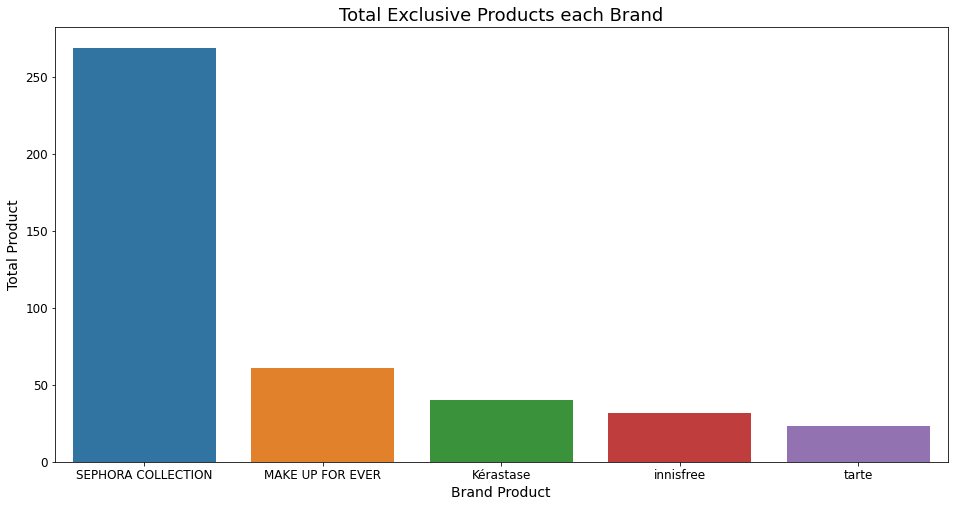

In [ ]:
plt.figure(figsize=(16, 8))
sns.barplot(
    y="Total_Produk",
    x="brand",
    data=plot_evidence)


plt.xlabel("Brand Product",fontsize=14)
plt.ylabel("Total Product",fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.title("Total Exclusive Products each Brand",fontsize=18)



# Summary about Sephora
* Jika dirata-ratakan produk yang dijual di e-commerce ada **dikisaran harga 20 sampai 50 dollar**.
* Jika dirata-ratakan **produk yang dijual** di e-commerce **setidaknya direview oleh kurang dari 100 customer**.
* **Produk yang dijual** di e-commerce sudah **mencapai lebih dari 2,3 juta**.
* 5 Kategori Produk yang paling disukai oleh customer adalah sebagai berikut:
  1. **Lipstick** dengan total love nya mencapai 1.610.700
  2. **Moisturizers** dengan total love nya mencapai 1.286.642
  3. **Face Masks** dengan total love nya mencapai 1.245.872
  4. **Face Brushes** dengan total love nya mencapai 1.236.776
  5. **Eye Palettes** dengan total love nya mencapai 1.135.900
* 5 Kategori Produk yang paling banyak review oleh customer adalah sebagai berikut:
  1. **Moisturizers** dengan total review nya mencapai 27.168
  2. **Face Serums** dengan total review nya mencapai 20.494
  3. **Facewash & Cleansers** dengan total review nya mencapai 17.629
  4. **Eye Creams & Treatments** dengan total review nya mencapai 16.116
  5. **Face Masks** dengan total review nya mencapai 16.027
* Produk yang paling banyak **mendapatkan review baik adalah TOUCHE ECLAT All-In-One Glow** dari brand Yves Saint Laurent yang termasuk keadalam kategori Tinted Moisturizer.
* Sedangkan secara keseluruhan **berdasarkan kategori produk**, yang paling banyak mendapatkan review baik dan disukai oleh customer adalah **face serums** dengan total review baik sebanyak 1054 dan love sebanyak 43000.
* Kategori produk yang paling banyak disukai adalah **kategori produk yang harganya terjangkau**. Sedangkan kategori produk yang paling banyak direview merupakan produk yang harganya mahal.
* Kategori produk yang **diberi strategi marketing** adalah **kategori produk yang paling banyak disukai oleh customer**. Tetapi dalam kategori tersebut ada produk yang tidak diberi strategi marketing dan jumlah nya lebih banyak.
* **Produk yang ekslusif bukanlah produk yang mahal** dan lebih banyak diisi oleh brand sephora sendiri.

# Recommendation

In [ ]:
#10 produk yang memiliki review yang baik dan disukai
review[(review['rating']>=4.203371)&
       (review['number_of_reviews']>=111.583122)&
       (review['love']>=8808.053979)].sort_values(by='number_of_reviews',ascending=False).reset_index(drop=True)
review_baik = review_baik.head(10)
review_baik

,brand,name,category,rating,number_of_reviews,love
0,Yves Saint Laurent,TOUCHE ECLAT All-In-One Glow,Tinted Moisturizer,4.5,548,33400
1,Playa,Ritual Hair Oil,Hair Oil,4.5,542,10800
2,PAT McGRATH LABS,Skin Fetish: Sublime Perfection Concealer,Concealer,4.5,539,22000
3,SEPHORA COLLECTION,Illuminate Palette,Highlighter,4.5,538,35200
4,Glow Recipe,Watermelon Glow Lip Pop,Lip Balms & Treatments,4.5,537,20800
5,Caudalie,Moisturizing Toner,Toners,4.5,533,35700
6,Dr. Jart+,Cicapair™ Tiger Grass Calming Gel Cream,Moisturizers,4.5,532,10200
7,Peter Thomas Roth,Retinol Fusion PM,Face Serums,4.5,530,20900
8,Hourglass,Arch Brow Micro Sculpting Pencil,Eyebrow,4.5,524,12100
9,Kate Somerville,Anti Bac Clearing Lotion,Face Serums,4.5,524,22100


### **1. Melakukan diskon dengan limited time offer** pada produk TOUCHE ECLAT All-In-One Glow dari brand Yves Saint Laurent. karena merupakan produk yang paling banyak direview dan disukai oleh customer.
* Atau melakukan diskon kepada produk serupa yang termasuk kedalam produk exlusive
* Atau melakukan diskon kepada produk brand sendiri yang serupa. :D

In [ ]:
df[(review['brand'].isin(['Yves Saint Laurent'])) &
   (review['category'].isin(['Tinted Moisturizer']))]

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,URL,MarketingFlags,MarketingFlags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer
8887,2038701,Yves Saint Laurent,Tinted Moisturizer,TOUCHE ECLAT All-In-One Glow,1.01 oz/ 30 mL,4.5,548,33400,48.0,48.0,https://www.sephora.com/product/touche-eclat-a...,1,0,no options,What it is: An oil-free moisturizer delivers a...,Suggested Usage:-For lighter coverage- squeeze...,-Hyaluronic Acid: Provides rich hydration.-Vit...,0,0,0,0


### **2. Membuat produk baru**, karena dari 10 produk yang mendapat review paling baik dan disukai oleh customer. Sephora belum memiliki produk hair oil dan Lip Balms & Treatments

In [ ]:
df[(review['brand'].isin(['SEPHORA COLLECTION'])) &
   (review['category'].isin(['hair oil','Lip Balms & Treatments']))]

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,URL,MarketingFlags,MarketingFlags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer
